# <span style='color:orange'> By: Dr.Eng. Mohanad Abukmeil</span>

# For the final exam, please read the following instructions:

### <span style='color:yellow'> This exam is related to the selected machine learning methods we described </span>
### <span style='color:yellow'> The weight of this exam is 40 marks. </span>
### <span style='color:yellow'> The exam contains 2 questions, where each question weighs 20 marks. </span>
### <span style='color:yellow'> Use Jupyter notebook to deliver your answer, where no need to use pycharm. </span>
### <span style='color:yellow'> Make your code readable by using specific comments. </span>

### <span style='color:yellow'> Any copy and paste between students entail 0 scores for both.</span> 
### <span style='color:yellow'>The deadline to deliver the exam's solution is on Saturday, 21/1/2022 at 23:59:00.</span>




# Q1: KNN algorithm (20 marks)

### <span style='color:yellow'> Use sklearn datasets to load  iris dataset using "load_iris()" and perform the following:</span>

### <span style='color:lightgreen'>1.1- Split iris dataset such that the testing set equals 30% of the whole dataset.
</span>

### <span style='color:lightgreen'>1.2- Use a scatter plot to visualize the dataset classes.
</span>


### <span style='color:lightgreen'>1.3- Use the KNN algorithm from the sklearn library and print the prediction results.
</span>

### <span style='color:lightgreen'>1.4- Build your own KNN algorithm (USE KNN class) to learn your data, and print the prediction results. 
</span>

### <span style='color:lightgreen'>1.5- Compare the accuracy in % between the KNN from sklearn and your KNN algorithm when K=3 and K=5. 
</span>


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df=load_iris()

In [2]:
# Ans 1.1-
X_train,X_test,y_train,y_test= train_test_split(df.data,df.target,test_size=0.30,random_state=44,shuffle=True) 

<Figure size 640x480 with 0 Axes>

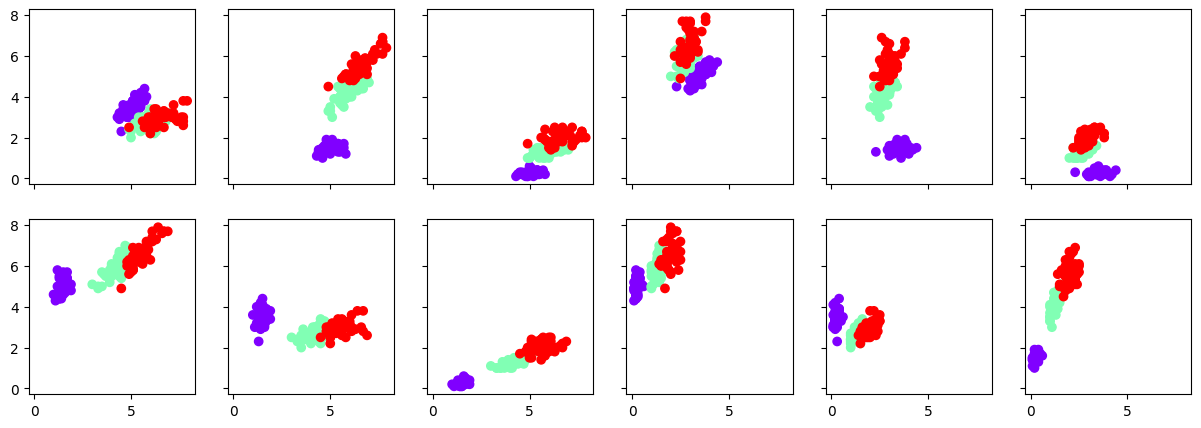

In [3]:
# Ans 1.2- 
f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 6, sharex=True, sharey = True)
#pring the data points
axes[0][0].scatter(df.data[:,0], df.data[:,1], c= df.target,cmap='rainbow' )
axes[0][1].scatter(df.data[:,0], df.data[:,2], c= df.target,cmap='rainbow' )
axes[0][2].scatter(df.data[:,0], df.data[:,3], c= df.target,cmap='rainbow' )
axes[0][3].scatter(df.data[:,1], df.data[:,0], c= df.target,cmap='rainbow' )
axes[0][4].scatter(df.data[:,1], df.data[:,2], c= df.target,cmap='rainbow' )
axes[0][5].scatter(df.data[:,1], df.data[:,3], c= df.target,cmap='rainbow' )
axes[1][0].scatter(df.data[:,2], df.data[:,0], c= df.target,cmap='rainbow' )
axes[1][1].scatter(df.data[:,2], df.data[:,1], c= df.target,cmap='rainbow' )
axes[1][2].scatter(df.data[:,2], df.data[:,3], c= df.target,cmap='rainbow' )
axes[1][3].scatter(df.data[:,3], df.data[:,0], c= df.target,cmap='rainbow' )
axes[1][4].scatter(df.data[:,3], df.data[:,1], c= df.target,cmap='rainbow' )
axes[1][5].scatter(df.data[:,3], df.data[:,2], c= df.target,cmap='rainbow' )
f.set_size_inches(15,5)
plt.show()

In [4]:
# Ans 1.3- 
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
classifier = knn_clf.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_pred)))
y_pred

[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

In [5]:
# Ans 1.4- 
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        y_pred = []
        for test_sample in X_test:
            distances = []
            for i in range(len(self.X_train)):
                distance = np.linalg.norm(test_sample - self.X_train[i])
                distances.append((distance, self.y_train[i]))
            k_neighbors = sorted(distances, key=lambda x: x[0])[:self.k]
            k_neighbors_labels = [label for _, label in k_neighbors]
            y_pred.append(max(set(k_neighbors_labels), key=k_neighbors_labels.count))
        return np.array(y_pred)
knnT = KNN(k=3)
knnT.fit(X_train, y_train)
y_predT = knnT.predict(X_test)
print(confusion_matrix(y_test,y_predT))
print(classification_report(y_test,y_predT))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_predT)))
y_predT

[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

In [6]:
# Ans 1.5-
######################sklearn 5 neighbors#####################################
knn_clf2 = KNeighborsClassifier(n_neighbors=5)
classifier2 = knn_clf.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
###################### my algorithm 3 n ############################################
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
###################### my algorithm 5 n ############################################
knn2 = KNN(k=5)
knn2.fit(X_train, y_train)
y_pred4 = knn2.predict(X_test)
######################################################################################
print("Sklearn 3 neighbors")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_pred)))
y_pred
print("Sklearn 5 neighbors")
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_pred2)))
y_pred2
print("my algorithm 3 neighbors")
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_pred3)))
y_pred3
print("my algorithm 5 neighbors")
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print("accuracy scoere :{}".format(accuracy_score(y_test, y_pred4)))
y_pred4

Sklearn 3 neighbors
[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

Sklearn 5 neighbors
[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

my algorithm 3 neighbors
[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

my algorithm 5 neighbors
[[17  0  0]
 [ 0 13  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

accuracy scoere :0.9777777777777777


array([2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 0,
       0])

# Q2: Logistic regression (20 marks)

### <span style='color:yellow'> Use sklearn datasets to load  breast cancer dataset using "load_breast_cancer()" and perform the following:</span>

### <span style='color:lightgreen'>2.1- Split the breast cancer dataset such that the testing set equals 25% of the whole dataset.
</span>

### <span style='color:lightgreen'>2.2- Use a scatter plot to visualize the first feature with respect to the labels.
</span>


### <span style='color:lightgreen'>2.3- Use the Logistic regression algorithm from the sklearn library and print the prediction results.
</span>

### <span style='color:lightgreen'>2.4- Build your own logistic regression algorithm (USE Logistic Regressor class) to learn your data,  and then print the prediction results. 
</span>

### <span style='color:lightgreen'>2.5- Compare the accuracy in % between the logistic regression algorithm from sklearn and your logistic regression algorithm the learning rate lr=0.01 and lr= 0.001. 
</span>


In [7]:
from sklearn.datasets import load_breast_cancer
df2=load_breast_cancer()

In [8]:
# Ans 2.1- 
X_train2,X_test2,y_train2,y_test2=train_test_split(df2.data,df2.target,test_size=0.25,random_state=44,shuffle=True)

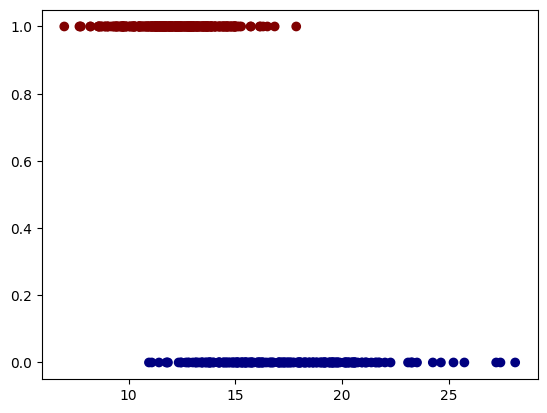

In [9]:
# Ans 2.2- 
plt.scatter(df2.data[:,0],df2.target,c=df2.target,cmap='jet')

In [10]:
# Ans 2.3- 
from sklearn.linear_model import LogisticRegression
Lg=LogisticRegression(solver='liblinear',max_iter=130,multi_class='ovr')
classifier3=Lg.fit(X_train2,y_train2)
y_pred5=classifier3.predict(X_test2)
print(confusion_matrix(y_test2,y_pred5))
print(classification_report(y_test2,y_pred5))
print(accuracy_score(y_test2, y_pred5))
y_pred5

[[46  2]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.98      0.99      0.98        95

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [11]:
# Ans 2.4- 
class LogisticRegressor:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient

    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return np.where(self.predict_prob(X)>=threshold,1,0)

#################################################
logistic_regressor = LogisticRegressor(num_iter=20000)

logistic_regressor.fit(X_train2, y_train2)

y_pred6 = logistic_regressor.predict(X_test2)
print(confusion_matrix(y_test2,y_pred6))
print(classification_report(y_test2,y_pred6))
print(accuracy_score(y_test2, y_pred6))

np.array(y_pred6)

C:\Users\abd50\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


[[45  3]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.97      0.99      0.98        95

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [12]:
# Ans 2.5- 
logistic_regressor2 = LogisticRegressor(lr=0.001)
logistic_regressor2.fit(X_train2, y_train2)
y_pred7 = logistic_regressor2.predict(X_test2)

C:\Users\abd50\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [13]:
print("lr 0.001")
print(confusion_matrix(y_test2,y_pred7))
print(classification_report(y_test2,y_pred7))
print(accuracy_score(y_test2, y_pred7))
print(y_pred7)
print("**********************************************************************************")
print("lr 0.01")
print(confusion_matrix(y_test2,y_pred6))
print(classification_report(y_test2,y_pred6))
print(accuracy_score(y_test2, y_pred6))
np.array(y_pred6)
print("**********************************************************************************")
print("sklearn")
print(confusion_matrix(y_test2,y_pred5))
print(classification_report(y_test2,y_pred5))
print(accuracy_score(y_test2, y_pred5))
y_pred5

lr 0.001
[[47  1]
 [ 3 92]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        48
           1       0.99      0.97      0.98        95

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

0.972027972027972
[0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1]
**********************************************************************************
lr 0.01
[[45  3]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.97      0.99      0.98        95

    accuracy                           0.97       143
   macro

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

**********************************************************************************
sklearn
[[46  2]
 [ 1 94]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        48
           1       0.98      0.99      0.98        95

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143

0.9790209790209791


array([0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1])